In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


In [2]:
# random state = 24 (40114124)
rs = 24

# Q1

## ب

In [3]:
spam = pd.read_csv('sms\spam.csv',encoding='latin1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [5]:
df = spam[['v1','v2']]
df.columns = ['label','text']
df['label'] = df['label'].map({'ham':0, 'spam':1})
labels = df['label'].values

C:\Users\moham\AppData\Local\Temp\ipykernel_9584\3412250810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham':0, 'spam':1})


In [6]:
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'].values).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=rs)

## ج

In [ ]:

class MultinomialNB_Scratch:
    def fit(self, X, y, alpha=1.0):
        self.alpha = alpha
        self.classes = np.unique(y)
        self.class_count = np.bincount(y)
        self.class_prior = self.class_count / len(y)  # P(class)

        self.feature_count = np.zeros((len(self.classes), X.shape[1]))
        for idx, c in enumerate(self.classes):
            self.feature_count[idx, :] = X[y == c].sum(axis=0)

        
        self.feature_log_prob = np.log((self.feature_count + alpha) /
                                       (self.feature_count.sum(axis=1)[:, np.newaxis] + alpha * X.shape[1]))

    def predict(self, X):
        log_probs = np.log(self.class_prior) + X @ self.feature_log_prob.T
        return np.argmax(log_probs, axis=1)

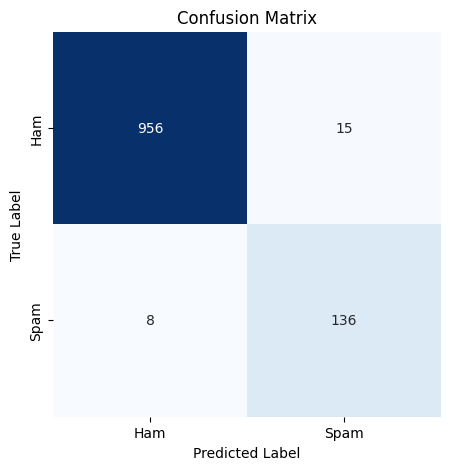

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       971
           1       0.90      0.94      0.92       144

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [8]:
model_scratch = MultinomialNB_Scratch()
model_scratch.fit(X_train, y_train)
y_pred = model_scratch.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


print(classification_report(y_test, y_pred))

## د

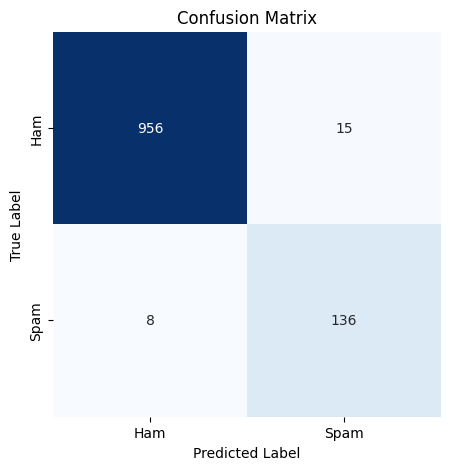

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       971
           1       0.90      0.94      0.92       144

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred))

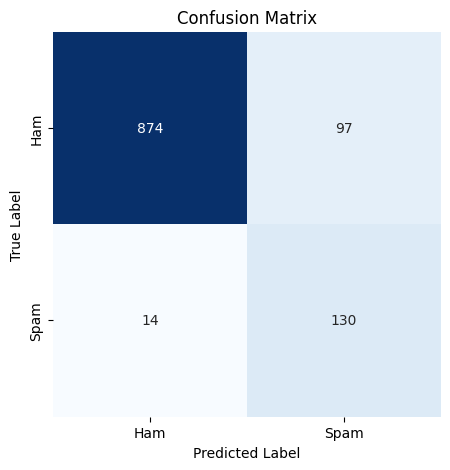

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       971
           1       0.57      0.90      0.70       144

    accuracy                           0.90      1115
   macro avg       0.78      0.90      0.82      1115
weighted avg       0.93      0.90      0.91      1115



In [10]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred))

# Q2

## آ & ب

In [11]:
mnist = pd.read_csv('mnist\mnist_train.csv')
mnist=mnist.sample(n=10000, random_state=rs)
mnist

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
28815,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5819,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44218,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8746,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42219,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train, mnist_test = train_test_split(mnist, train_size=0.7, test_size=0.3, random_state=rs)

In [13]:
mnist_train_label = mnist_train['label'].values
mnist_test_label = mnist_test['label'].values

mnist_train = mnist_train.drop('label', axis=1)
mnist_test = mnist_test.drop('label', axis=1)

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()


scaler.fit(mnist_train)

mnist_train_scaled=scaler.transform(mnist_train)
mnist_train_scaled = pd.DataFrame(data=mnist_train_scaled, columns=mnist_train.columns)

mnist_test_scaled=scaler.transform(mnist_test)
mnist_test_scaled = pd.DataFrame(data=mnist_test_scaled, columns=mnist_test.columns)

mnist_test_scaled

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ج & د

In [15]:
score_list=[]
best_score=0
best_k=0


for k in range(1,26):   

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(mnist_train_scaled,mnist_train_label)
    predict=knn.predict(mnist_test_scaled)
    acc = accuracy_score(mnist_test_label,predict)
    score_list.append(acc)
    if acc>best_score:
        best_score=acc
        best_k = k

print(f'Accuracy of KNN, best:{best_score} at K: {best_k}')

Accuracy of KNN, best:0.9446666666666667 at K: 5


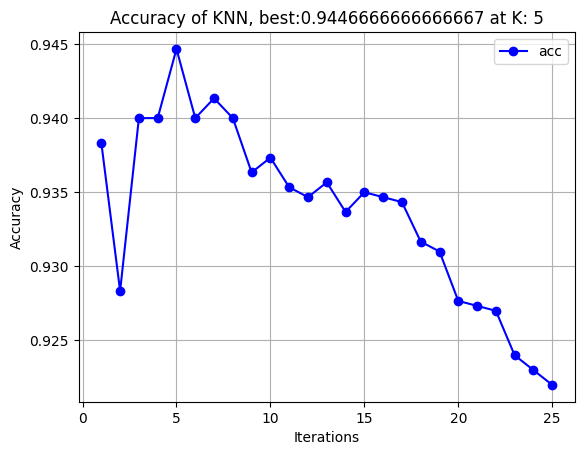

In [16]:
plt.plot(range(1,26),score_list, marker='o', color='blue',label='acc')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title(f'Accuracy of KNN, best:{best_score} at K: {best_k}')
plt.grid(True)
plt.legend()
plt.show()

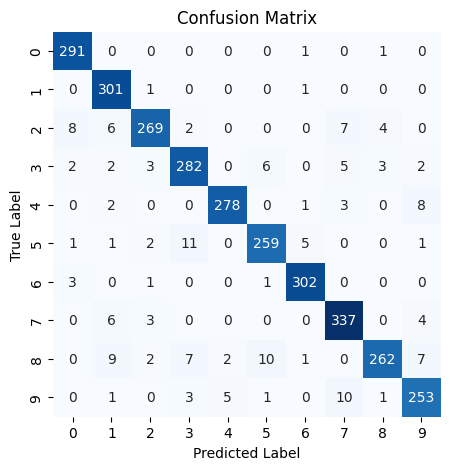

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       293
           1       0.92      0.99      0.95       303
           2       0.96      0.91      0.93       296
           3       0.92      0.92      0.92       305
           4       0.98      0.95      0.96       292
           5       0.94      0.93      0.93       280
           6       0.97      0.98      0.98       307
           7       0.93      0.96      0.95       350
           8       0.97      0.87      0.92       300
           9       0.92      0.92      0.92       274

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.95      0.94      0.94      3000



In [17]:
# Confusion Matrix For The Best K

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(mnist_train_scaled,mnist_train_label)
predict_test = knn.predict(mnist_test_scaled)


cm = confusion_matrix(mnist_test_label, predict_test)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(mnist_test_label, predict_test))

## د (PCA)

The best combination is: PCA Components:40 with K:5 ---------> Accuracy:0.9563333333333334


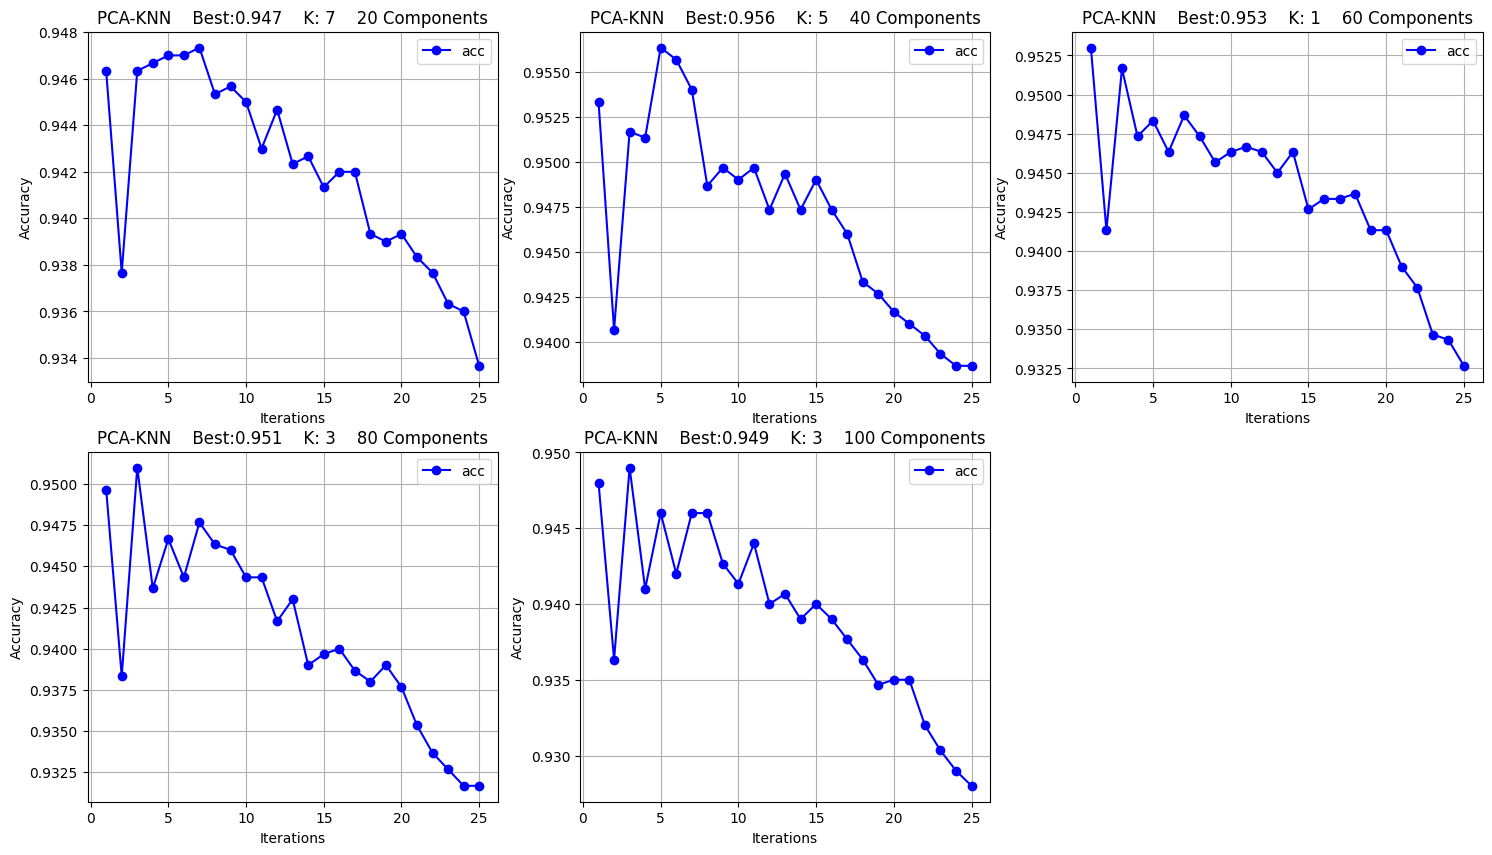

In [18]:
plt.figure(figsize=(18, 10))
c=1
all_best_score=0
all_best_k=0
all_best_comp=0


for j in range(20,101,20):
    pca = PCA(n_components=j,random_state=rs)
    pca.fit(mnist_train_scaled)

    pca_train = pca.transform(mnist_train_scaled)
    pca_test = pca.transform(mnist_test_scaled)


    score_list=[]
    best_score=0
    best_k=0
    k_max = 25

    for k in range(1,k_max+1):   

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(pca_train,mnist_train_label)
        predict=knn.predict(pca_test)
        acc = accuracy_score(mnist_test_label,predict)
        score_list.append(acc)
        if acc>best_score:
            best_score=acc
            best_k = k

        if acc>all_best_score:
            all_best_k=k
            all_best_comp=j
            all_best_score=best_score


    plt.subplot(2,3,c) 
    plt.plot(range(1,k_max+1),score_list, marker='o', color='blue',label='acc')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'PCA-KNN    Best:{best_score:.3f}    K: {best_k}    {j} Components')
    plt.grid(True)
    plt.legend()
    c=c+1


print(f'The best combination is: PCA Components:{all_best_comp} with K:{all_best_k} ---------> Accuracy:{all_best_score}')

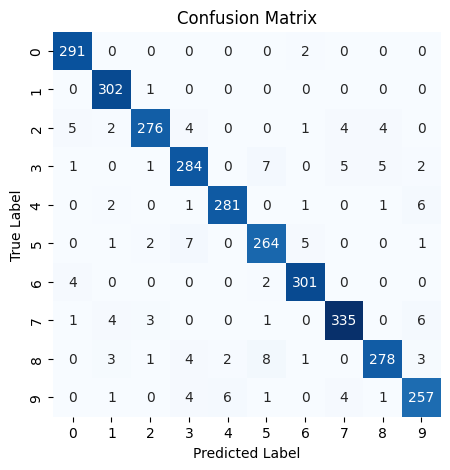

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       293
           1       0.96      1.00      0.98       303
           2       0.97      0.93      0.95       296
           3       0.93      0.93      0.93       305
           4       0.97      0.96      0.97       292
           5       0.93      0.94      0.94       280
           6       0.97      0.98      0.97       307
           7       0.96      0.96      0.96       350
           8       0.96      0.93      0.94       300
           9       0.93      0.94      0.94       274

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [19]:
# Confusion Matrix For The Best K and The Best n_components


pca = PCA(n_components=all_best_comp,random_state=rs)
pca.fit(mnist_train_scaled)

pca_train = pca.transform(mnist_train_scaled)
pca_test = pca.transform(mnist_test_scaled)

knn = KNeighborsClassifier(n_neighbors=all_best_k)
knn.fit(pca_train,mnist_train_label)
predict_test = knn.predict(pca_test)


cm = confusion_matrix(mnist_test_label, predict_test)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(mnist_test_label, predict_test))